# Feature engineering
In this homework we will see how to create new features and measure association between two categorical variables. There are more columns for feature engineering but we'll focus on name columns an age.

To illustrates the concept, we will use titanic dataset. This is a well explored dataset but provides a lot of opportunity for feature engineering.


In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
%matplotlib inline
sns.set(style="darkgrid")

In [146]:

titanic_df = pd.read_csv('https://raw.githubusercontent.com/utsav507/titanic-data-analysis/master/titanic_train.csv')

In [147]:
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [148]:
titanic_df['Name'].sample(20)

545                      Nicholson, Mr. Arthur Ernest
171                              Rice, Master. Arthur
521                                   Vovk, Mr. Janko
809    Chambers, Mrs. Norman Campbell (Bertha Griggs)
471                                   Cacic, Mr. Luka
878                                Laleff, Mr. Kristo
576                              Garside, Miss. Ethel
221                              Bracken, Mr. James H
270                             Cairns, Mr. Alexander
460                               Anderson, Mr. Harry
687                                 Dakic, Mr. Branko
51                       Nosworthy, Mr. Richard Cater
235                      Harknett, Miss. Alice Phoebe
541              Andersson, Miss. Ingeborg Constanzia
16                               Rice, Master. Eugene
746                       Abbott, Mr. Rossmore Edward
607                       Daniel, Mr. Robert Williams
798                      Ibrahim Shawah, Mr. Yousseff
38                 Vander Pl

In [149]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [150]:
titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

- As you can see a lot of people don't have a cabin(687/891). We can't drop record based on cabin. We'll encode this as no_cabin

In [151]:
titanic_df.Cabin.fillna('O', inplace = True)

There is one more issue. If one hot encode cabin and view correlation heatmap, there will be a lot of categories. Let create a new column based on cabin class letter first letter(C, D ,E, O etc.) .

In [152]:
 titanic_df['Cabin_type'] = titanic_df.Cabin.str[0]

In [153]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_type
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,O,S,O
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,O,S,O
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,O,S,O


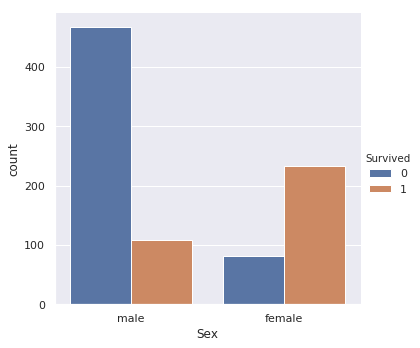

In [154]:
sns.catplot(x="Sex", kind="count", hue='Survived',  data=titanic_df)

Looks like relatively more female survived. 

In [155]:
titanic_df[titanic_df.Sex=='female'].sample(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_type
581,582,1,1,"Thayer, Mrs. John Borland (Marian Longstreth M...",female,39.0,1,1,17421,110.8833,C68,C,C
609,610,1,1,"Shutes, Miss. Elizabeth W",female,40.0,0,0,PC 17582,153.4625,C125,S,C
161,162,1,2,"Watt, Mrs. James (Elizabeth ""Bessie"" Inglis Mi...",female,40.0,0,0,C.A. 33595,15.7500,O,S,O
865,866,1,2,"Bystrom, Mrs. (Karolina)",female,42.0,0,0,236852,13.0000,O,S,O
610,611,0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.0,1,5,347082,31.2750,O,S,O
564,565,0,3,"Meanwell, Miss. (Marion Ogden)",female,NaN,0,0,SOTON/O.Q. 392087,8.0500,O,S,O
85,86,1,3,"Backstrom, Mrs. Karl Alfred (Maria Mathilda Gu...",female,33.0,3,0,3101278,15.8500,O,S,O
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,O,C,O
39,40,1,3,"Nicola-Yarred, Miss. Jamila",female,14.0,1,0,2651,11.2417,O,C,O
318,319,1,1,"Wick, Miss. Mary Natalie",female,31.0,0,2,36928,164.8667,C7,S,C


Looks like Title in the name can be more predictive power for survival rate. 
Using name for building any machine learning classifier(logistic regression) is not clear.
Let extract the Title. see if this gives more insight.

In [156]:
titanic_df['Title']= titanic_df.Name.str.split(',', expand =True)[1].str.split(' ', expand=True)[1]

In [157]:
titanic_df.Title.unique()

array(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Don.', 'Rev.', 'Dr.', 'Mme.',
       'Ms.', 'Major.', 'Lady.', 'Sir.', 'Mlle.', 'Col.', 'Capt.', 'the',
       'Jonkheer.'], dtype=object)

You can look in wiki pedia see what different title meant that time.

In [158]:
titanic_df[titanic_df.Title == "the"]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_type,Title
759,760,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,110152,86.5,B77,S,B,the


Let's fix title **the** to **Contess**

In [159]:

titanic_df[titanic_df.Title == "the"].Title = "Countess"

/media/psnegi/psn/du/teaching/teach_2019/data_mining/data_mining_env/lib/python3.5/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


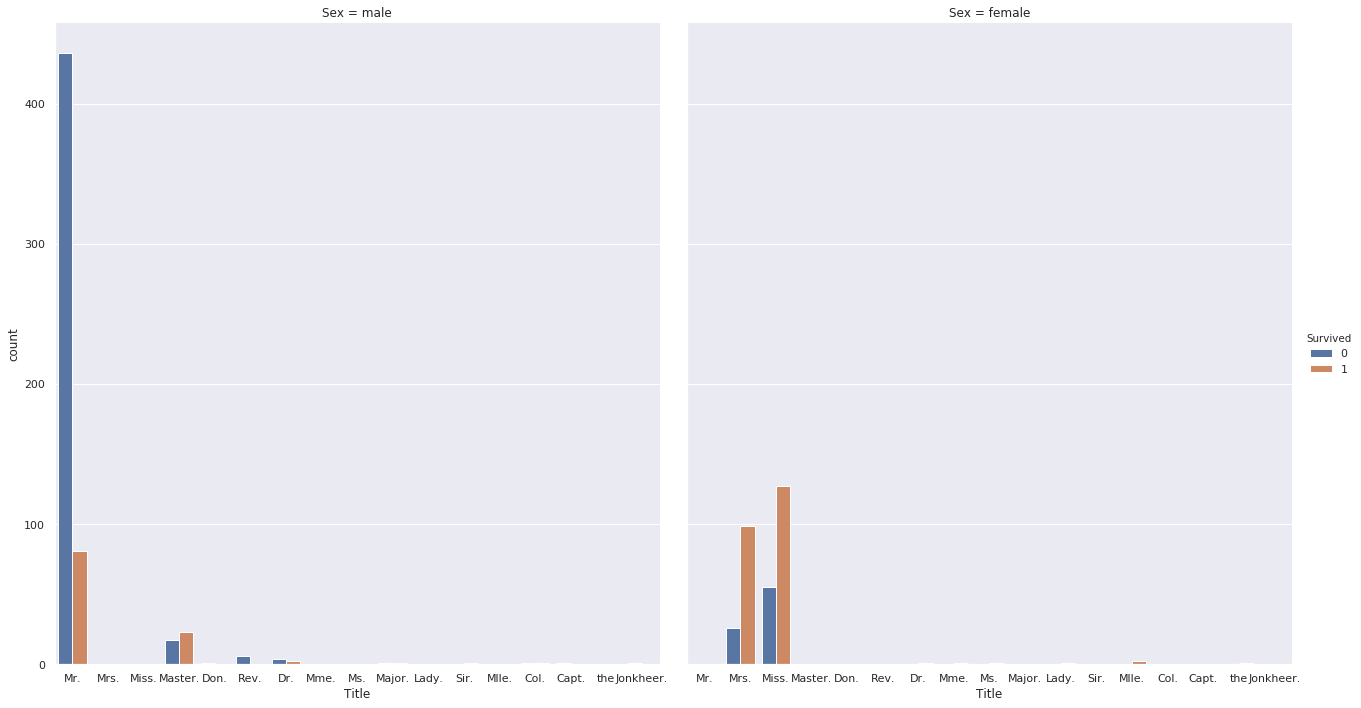

In [160]:
#f ,ax= plt.subplots(figsize=(16,10))
sns.catplot(x="Title", kind="count", col ='Sex' , hue='Survived', height=10, aspect=.9,  data=titanic_df)


Clearly young children(Mr., Miss) and Mrs. had more survival rate.

Let's fix Age nan issue. It has 167 nan values. 

Let's try to fill the Age nan value by the mean for each title group.

In [161]:
avg_age = titanic_df.groupby('Title')['Age'].mean()
avg_age

Title
Capt.        70.000000
Col.         58.000000
Don.         40.000000
Dr.          42.000000
Jonkheer.    38.000000
Lady.        48.000000
Major.       48.500000
Master.       4.574167
Miss.        21.773973
Mlle.        24.000000
Mme.         24.000000
Mr.          32.368090
Mrs.         35.898148
Ms.          28.000000
Rev.         43.166667
Sir.         49.000000
the          33.000000
Name: Age, dtype: float64

In [162]:
avg_age.to_dict()

{'Capt.': 70.0,
 'Col.': 58.0,
 'Don.': 40.0,
 'Dr.': 42.0,
 'Jonkheer.': 38.0,
 'Lady.': 48.0,
 'Major.': 48.5,
 'Master.': 4.574166666666667,
 'Miss.': 21.773972602739725,
 'Mlle.': 24.0,
 'Mme.': 24.0,
 'Mr.': 32.368090452261306,
 'Mrs.': 35.898148148148145,
 'Ms.': 28.0,
 'Rev.': 43.166666666666664,
 'Sir.': 49.0,
 'the': 33.0}

In [163]:
titanic_df.Age = titanic_df.groupby('Title')['Age'].transform(lambda x: x.fillna(x.mean()))

                                                  

In [164]:
titanic_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
Cabin_type     0
Title          0
dtype: int64

There are two record with missing Embarked value.

In [165]:
titanic_df.shape

(891, 14)

In [166]:
# Let's drop these two record
titanic_df.dropna(subset=['Embarked'], inplace=True)

In [167]:
titanic_df.Sex = np.where(titanic_df['Sex'] =='male', 1, 0)

In [168]:
titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Cabin_type      object
Title           object
dtype: object

In [169]:
titanic_df.columns.tolist()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked',
 'Cabin_type',
 'Title']

In [170]:
titanic_clean_df= titanic_df[[
 'Survived',
 'Pclass',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Embarked',
 'Cabin_type',
 'Title']]

In [171]:
titanic_clean_df.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [172]:

for name in ['Title', 'Cabin_type']:
    titanic_clean_df =pd.concat([titanic_clean_df, pd.get_dummies(titanic_clean_df[name], prefix= name)], axis=1)
    titanic_clean_df.drop([name], axis= 1, inplace= True)

In [173]:
titanic_clean_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title_Capt.,Title_Col.,...,Title_the,Cabin_type_A,Cabin_type_B,Cabin_type_C,Cabin_type_D,Cabin_type_E,Cabin_type_F,Cabin_type_G,Cabin_type_O,Cabin_type_T
0,0,3,1,22.000000,1,0,7.2500,S,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,1,0,38.000000,1,0,71.2833,C,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,3,0,26.000000,0,0,7.9250,S,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,1,0,35.000000,1,0,53.1000,S,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,3,1,35.000000,0,0,8.0500,S,0,0,...,0,0,0,0,0,0,0,0,1,0
5,0,3,1,32.368090,0,0,8.4583,Q,0,0,...,0,0,0,0,0,0,0,0,1,0
6,0,1,1,54.000000,0,0,51.8625,S,0,0,...,0,0,0,0,0,1,0,0,0,0
7,0,3,1,2.000000,3,1,21.0750,S,0,0,...,0,0,0,0,0,0,0,0,1,0
8,1,3,0,27.000000,0,2,11.1333,S,0,0,...,0,0,0,0,0,0,0,0,1,0
9,1,2,0,14.000000,1,0,30.0708,C,0,0,...,0,0,0,0,0,0,0,0,1,0


In [174]:
titanic_clean_df.dtypes

Survived             int64
Pclass               int64
Sex                  int64
Age                float64
SibSp                int64
Parch                int64
Fare               float64
Embarked            object
Title_Capt.          uint8
Title_Col.           uint8
Title_Don.           uint8
Title_Dr.            uint8
Title_Jonkheer.      uint8
Title_Lady.          uint8
Title_Major.         uint8
Title_Master.        uint8
Title_Miss.          uint8
Title_Mlle.          uint8
Title_Mme.           uint8
Title_Mr.            uint8
Title_Mrs.           uint8
Title_Ms.            uint8
Title_Rev.           uint8
Title_Sir.           uint8
Title_the            uint8
Cabin_type_A         uint8
Cabin_type_B         uint8
Cabin_type_C         uint8
Cabin_type_D         uint8
Cabin_type_E         uint8
Cabin_type_F         uint8
Cabin_type_G         uint8
Cabin_type_O         uint8
Cabin_type_T         uint8
dtype: object

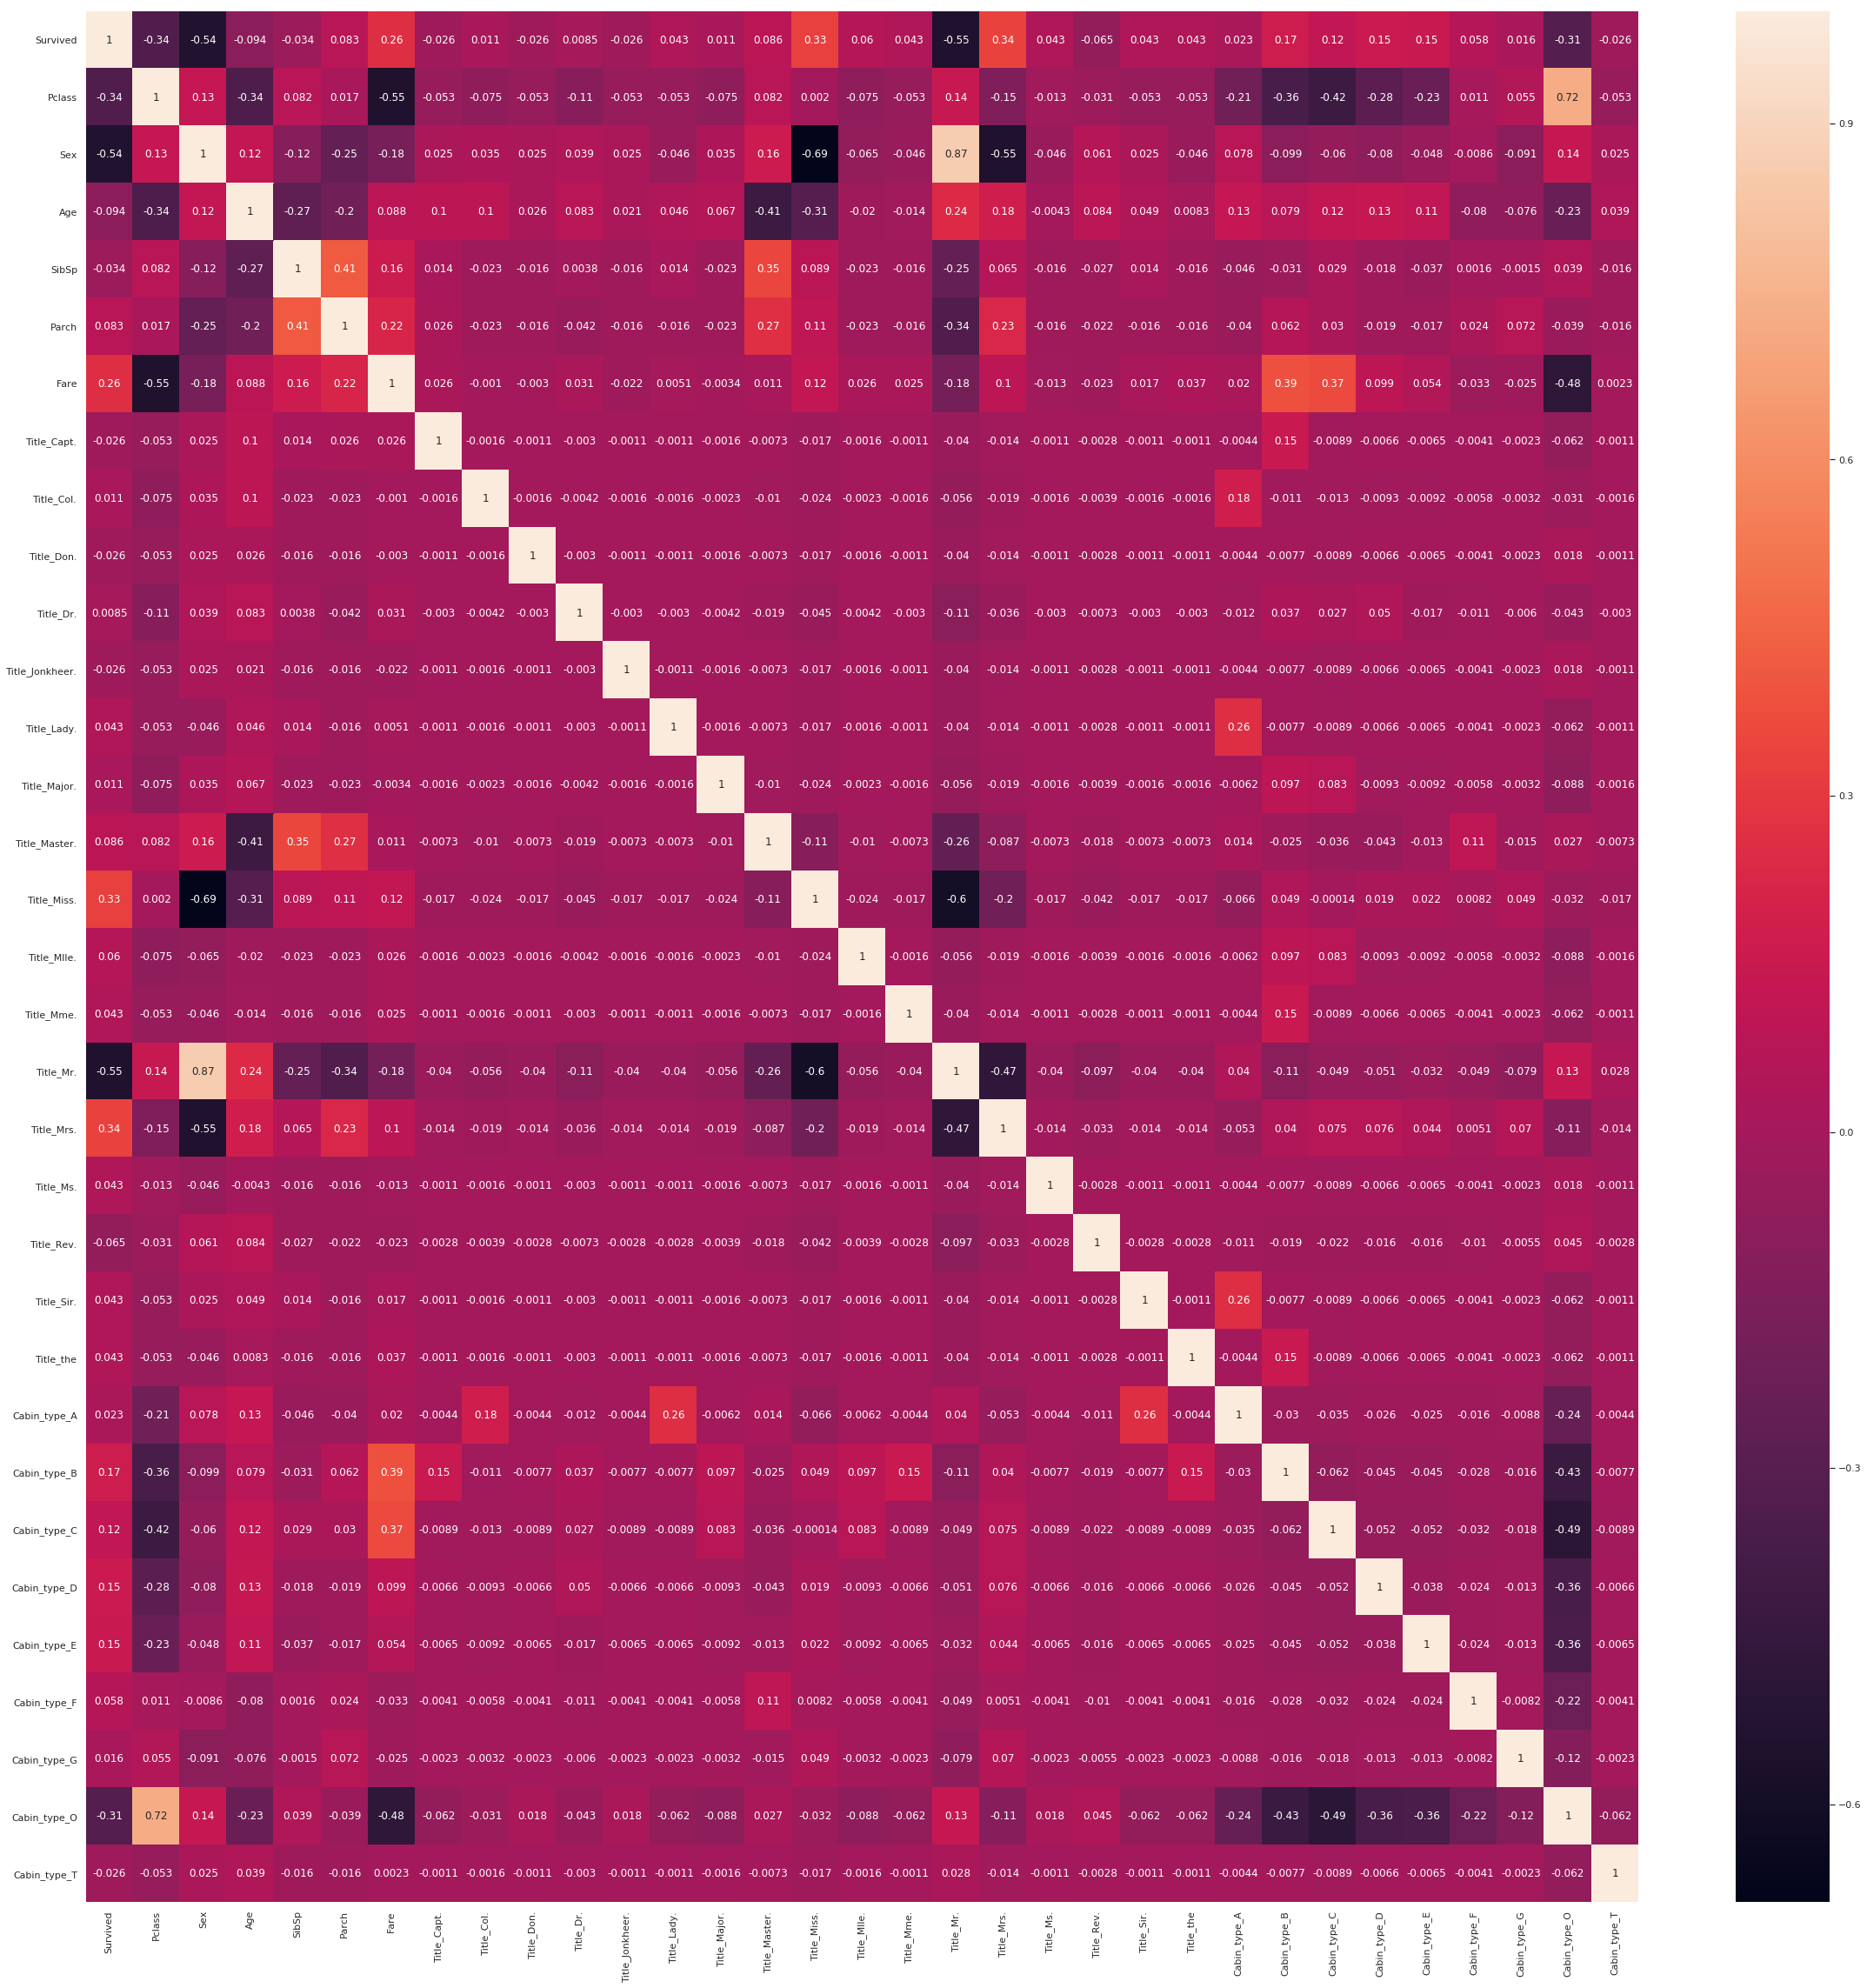

In [175]:
plt.subplots(figsize=(40,40))
corr = titanic_clean_df.corr()
sns.heatmap(corr, annot=True)
plt.show()

As you look along the first columns, you can see that Miss Ms and Mr have high correlation with the Survived. 

This correlation  measures **linear relationships** and is defined for numeric attributes. Also, be careful that
there need not the a linear relationship between variables(Survived vs any other attributes).

For categorical variable, we need to use a different measure of association.

- [Cramér's V, measure of association between two nominal variables](https://en.wikipedia.org/wiki/Cram%C3%A9r%27s_V)

It is based on a nominal variation of Pearson’s Chi-Square Test.

Let's use this implementation from stack overflow
https://stackoverflow.com/questions/46498455/categorical-features-correlation/46498792#46498792. It shows usage for **tips** dataset from seaborn.

Let's copy paste this here

In [176]:
def cramers_v(confusion_matrix):
    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher,
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

Let's work with  titanic dataset again

In [103]:
# Let's copy titanic_df and label encode Title

In [177]:
titanic_df_small = titanic_df.copy()
titanic_df_small = titanic_df_small[titanic_df_small.Title.str.contains("Master.|Miss.|Mr.|Mrs.", regex=True) ]
titanic_df_small.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_type,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,O,S,O,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,C,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,O,S,O,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,C,Mrs.
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,O,S,O,Mr.


In [178]:
pd.crosstab(titanic_df_small["Survived"], titanic_df_small["Title"])

Title,Master.,Miss.,Mr.,Mrs.
Survived,,,,
0,17,55,436,26
1,23,126,81,98


In [179]:
confusion_matrix = pd.crosstab(titanic_df_small["Survived"], titanic_df_small["Title"]).values

print(confusion_matrix)
cramers_v(confusion_matrix)

[[ 17  55 436  26]
 [ 23 126  81  98]]


0.56837187121439

In [180]:
titanic_df.shape, titanic_df_small.shape

((889, 14), (862, 14))

In [181]:
from sklearn.preprocessing import LabelEncoder

In [182]:
titanic_df_small['Encoded_title'] = LabelEncoder().fit_transform(titanic_df_small['Title'])
titanic_df_small.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_type,Title,Encoded_title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,O,S,O,Mr.,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,C,Mrs.,3
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,O,S,O,Miss.,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,C,Mrs.,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,O,S,O,Mr.,2


In [183]:
np.corrcoef(titanic_df_small['Survived'], titanic_df_small['Encoded_title'])

array([[ 1.        , -0.07287583],
       [-0.07287583,  1.        ]])

In future homework we'll work more toward  outlier detection and building robust Survival predictor model.